
Abdul A.

20BRS1185

Lab 3

Perform an anova on the data, use regression and residual analysis along with the df and mean square to determine the p-value of the regression


In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [16]:
#import data and read five random samples from the data
df = pd.read_excel('datasets/MLR-House Prize.xlsx')
df = df.sample(5)
df.head()



,Unnamed: 0,X1,X2,X3,Y
14,14,2696,22.7,3.5,619.3
27,27,3572,29,4,863.8
10,10,2591,19.2,2,544.3
12,12,2822,23.1,3,637.7
19,19,2885,23.2,3,663.6


In [17]:
'''
defining formulas
'''
y = np.array(df['Y']) 
#mean of x1, x2 and x3
y_hat = np.mean(df[['X1', 'X2', 'X3']], axis=1)
y_bar = y.mean()
y_hat.head()

#finding k
def k(y, y_hat):
    return df_reg(y, y_hat) / df_tot(y, y_hat)
#ssr
def ssr(y, y_hat):
    return ((y_hat - y)**2).sum()
#sse
def sse(y, y_hat):
    return ((y - y_hat)**2).sum()
#sst
def sst(y):
    return ssr(y, y_hat) + sse(y, y_hat)

#df for regression, k = degree of freedom
def df_reg(y, y_hat):
    return len(y) - 1
#df for total, k = degree of freedom
def df_tot(y, y_hat):
    return len(y) - 1 + len(y_hat)


#msr
def msr(y, y_hat):
    return ssr(y, y_hat) / df_reg(y, y_hat)
#mse
def mse(y, y_hat):
    return sse(y, y_hat) / df_reg(y, y_hat)

#F
def F(y, y_hat):
    return msr(y, y_hat) / mse(y, y_hat)
#p-value
def p_value(y, y_hat):
    return 1 - stats.f.cdf(F(y, y_hat), df_reg(y, y_hat), df_tot(y, y_hat))

k = 0.4444444444444444
ssr = 494976.5666666667
sse = 494976.5666666667
sst = 989953.1333333334
df_reg = 4
df_tot = 9
msr = 123744.14166666668
mse = 123744.14166666668
F = 1.0
p-value = 0.45578974399104866




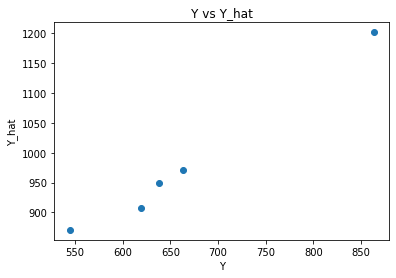

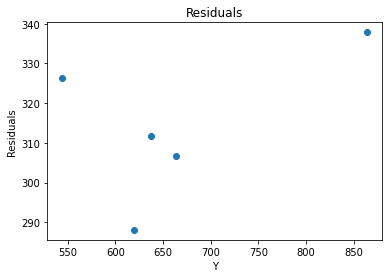

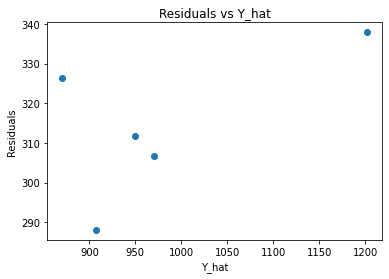

In [18]:
def main():
    #printing the results
    print('k =', k(y, y_hat))
    print('ssr =', ssr(y, y_hat))
    print('sse =', sse(y, y_hat))
    print('sst =', sst(y))
    print('df_reg =', df_reg(y, y_hat))
    print('df_tot =', df_tot(y, y_hat))
    print('msr =', msr(y, y_hat))
    print('mse =', mse(y, y_hat))
    print('F =', F(y, y_hat))
    print('p-value =', p_value(y, y_hat))
    print('\n')
    #plotting the results
    plt.scatter(y, y_hat)
    plt.xlabel('Y')
    plt.ylabel('Y_hat')
    plt.title('Y vs Y_hat')
    plt.show()
    #plotting the residuals
    plt.scatter(y, y_hat - y)
    plt.xlabel('Y')
    plt.ylabel('Residuals')
    plt.title('Residuals')
    plt.show()
    #plotting the residuals vs the y_hat
    plt.scatter(y_hat, y_hat - y)
    plt.xlabel('Y_hat')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Y_hat')
    plt.show()

main()